In [7]:
# Install and upgrade speciesnet quietly
! pip install -Uqq speciesnet

In [8]:
from IPython.display import display
from IPython.display import JSON

from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet
from speciesnet import SUPPORTED_MODELS

In [9]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

In [10]:
print("Default SpeciesNet model:", DEFAULT_MODEL)
print("Supported SpeciesNet models:", SUPPORTED_MODELS)

Default SpeciesNet model: kaggle:google/speciesnet/pyTorch/v4.0.1a
Supported SpeciesNet models: ['kaggle:google/speciesnet/pyTorch/v4.0.1a', 'kaggle:google/speciesnet/pyTorch/v4.0.1b']


In [11]:
# Pick the model we want to use (4.0.1b)
model = SpeciesNet("kaggle:google/speciesnet/pyTorch/v4.0.1b")
default_model = SpeciesNet(DEFAULT_MODEL)

In [ ]:
# Run speciesnet on the folder of images
# predictions_dict = model.predict(folders=["images"], country="USA")
default_predictions_dict = default_model.predict(folders=["images"], country="USA", admin1_region="IL")

# Display the predictions
print_predictions(default_predictions_dict)
display(JSON(default_predictions_dict))

Predictions:
images/image_0.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_1.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_2.jpg => f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank
images/image_3.jpg => f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank
images/image_4.jpg => 6c09fa63-2acc-4915-a60b-bd8cee40aedb;mammalia;lagomorpha;leporidae;;;rabbit and hare family
images/image_5.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_6.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_7.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_8.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal
images/image_9.jpg => 1f689929-883d-4dae-958c-3d57ab5b6c16;;;;;;animal


<IPython.core.display.JSON object>

In [ ]:
# Save the predictions dict to a json file
import json

with open("default_predictions.json", "w") as f:
    json.dump(default_predictions_dict, f, indent=2)

# with open("full_predictions.json", "w") as f:
#     json.dump(predictions_dict, f, indent=2)

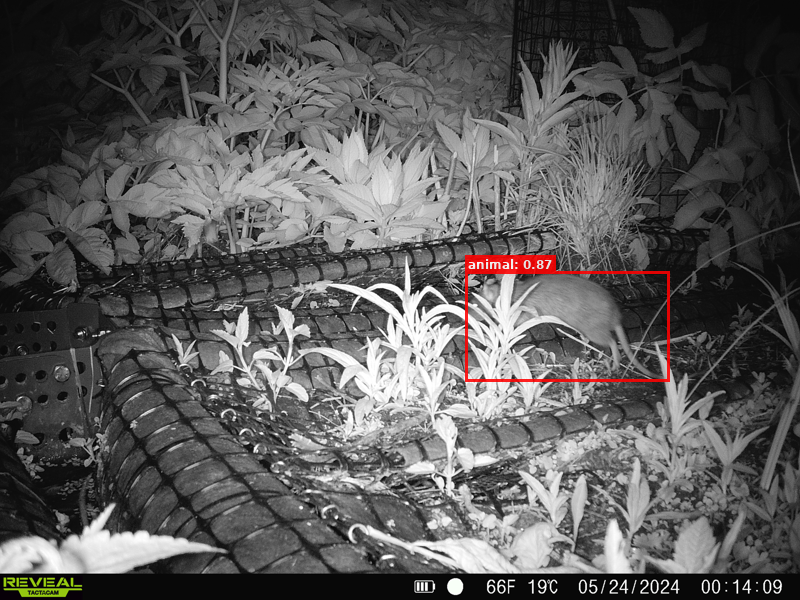

In [ ]:
prediction_item = default_predictions_dict["predictions"][4]
img = load_rgb_image(prediction_item["filepath"])
detections = prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)

In [15]:
! pip install megadetector-utils -Uqq

In [ ]:
from megadetector.visualization import visualize_detector_output

visualize_detector_output.visualize_detector_output(
    detector_output_path="default_predictions.json",
    out_dir="default_preview",
    images_dir="./"
)


This appears to be a SpeciesNet output file, converting to MD format
Writing temporary results to C:\Users\mores\AppData\Local\Temp\megadetector_temp_files\959f0828-31ee-11f0-9c13-acd5647db9b0.json
Detector output file contains 10 entries.
Rendering detections above a confidence threshold of 0.15


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


Skipped 0 failed images (of 10)
Skipped 0 missing images (of 10)
Skipped 0 below-threshold images (of 10)
Rendered detection results to full_preview
This appears to be a SpeciesNet output file, converting to MD format
Writing temporary results to C:\Users\mores\AppData\Local\Temp\megadetector_temp_files\98b8808f-31ee-11f0-98e7-acd5647db9b0.json
Detector output file contains 10 entries.
Rendering detections above a confidence threshold of 0.15


100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

Skipped 0 failed images (of 10)
Skipped 0 missing images (of 10)
Skipped 0 below-threshold images (of 10)
Rendered detection results to default_preview


['default_preview\\anno_images~image_0.jpg',
 'default_preview\\anno_images~image_1.jpg',
 'default_preview\\anno_images~image_2.jpg',
 'default_preview\\anno_images~image_3.jpg',
 'default_preview\\anno_images~image_4.jpg',
 'default_preview\\anno_images~image_5.jpg',
 'default_preview\\anno_images~image_6.jpg',
 'default_preview\\anno_images~image_7.jpg',
 'default_preview\\anno_images~image_8.jpg',
 'default_preview\\anno_images~image_9.jpg']